## Dataset
The dataset consists of math, reading and writing scores of students along with some influencing factors such as gender, race, parents education, lunch type, and if the student took test preparation courses. 

## Goals
#### Inference
* Identify interesting correlations within the dataset. 
* The lunch column is an interesting factor I didnt expect in such a dataset. I want to explore its impact on the scores? 

### Prediction
* Try different models in predicting scores based on the input factors.

## Key Takeaways

* Whether the student gets the standard lunch or free/reduced lunch has an impact on the scores. It is evident students from lower income families on an average have 5-10 points lower scores than those who can afford standard lunches. 
* Test preparation provides a stastically signficant improvent in test scores. However, the difference in means are consistently higher for students with 'free/reduced' lunch type. This indicates test preparation has an outsized impact on scores for students from low income families (6 points increase for math and more than 11 points increase for writing).
* Predictive models suggest the most important variables driving higher scores are 
    * lunch = 'standard'
    * test preparation course = 'completed'
    * parental education level = 'bachelors/masters degree'
    * race/ethnic_group = 'E'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
path = '../input/'
SP_df = pd.read_csv('StudentsPerformance.csv')
SP_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Categorical count of independent variables

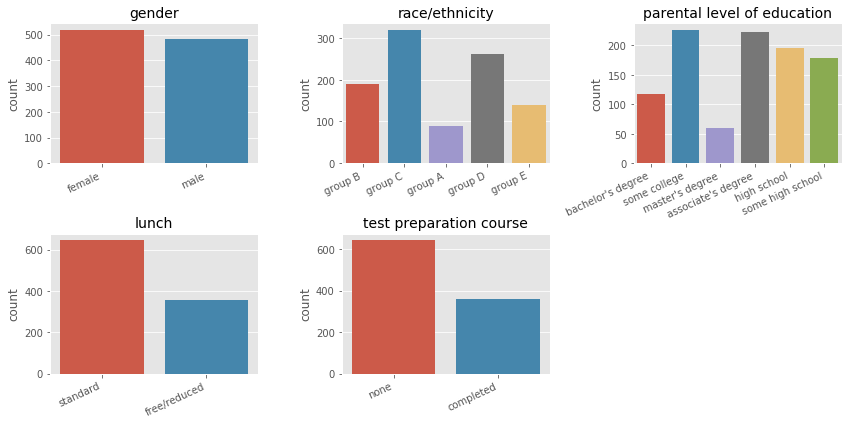

In [3]:

in_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
fig,axarr = plt.subplots(2,3,figsize=(12,6))
axarr[-1, -1].axis('off')
for id,col in enumerate(in_cols):
    ax = axarr.flat[id]
    sns.countplot(x=col, data=SP_df,ax=ax)
    ax.set_title(col,fontsize=14)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=25,ha='right')
plt.tight_layout()
plt.show()

### What factors correlate with low scores?
* Here we look at count plots for students with scores below 40 in atleast one subject
+ `Lunch = Free/reduced Lunch`, `test preparation = 'none'` and `parental level of education != 'masters degree'` has high correlation with low scores.

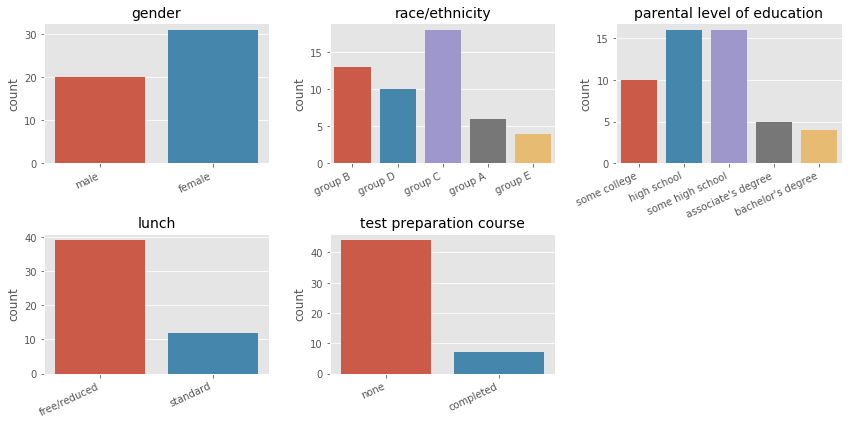

In [4]:
Low_df = SP_df[(SP_df['math score']<40) | (SP_df['reading score']<40) | (SP_df['writing score']<40)]
in_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
fig,axarr = plt.subplots(2,3,figsize=(12,6))
axarr[-1, -1].axis('off')
for id,col in enumerate(in_cols):
    ax = axarr.flat[id]
    sns.countplot(x=col, data=Low_df,ax=ax)
    ax.set_title(col,fontsize=14)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=25,ha='right')
plt.tight_layout()
plt.show()

### Distribution of student scores
* All the scores are approximately normally distributed. Q-Q plots show skewness in both directions, indicating deviation from normal distribution in those regions.
* Joint distributions show strong correlation between test scores among different subjects which is not surprising.

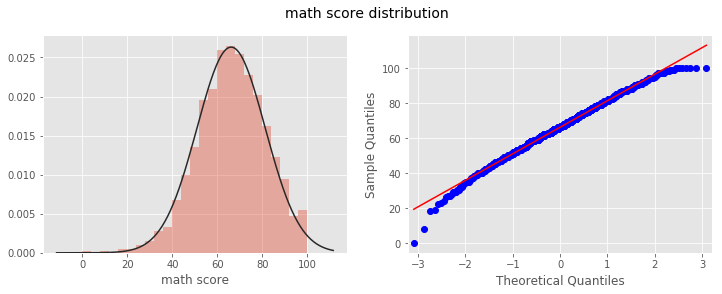

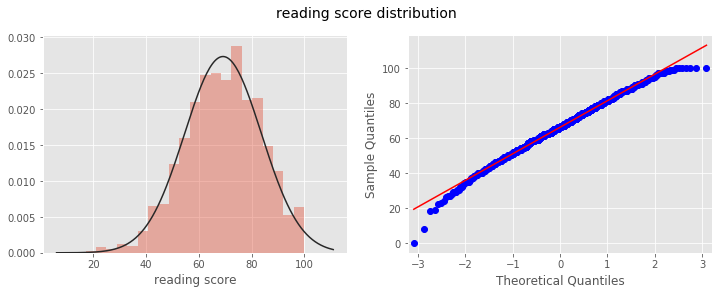

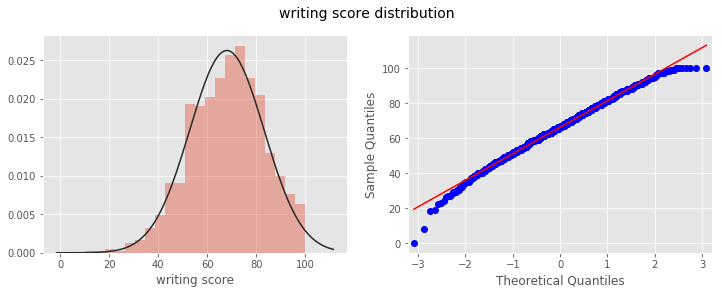

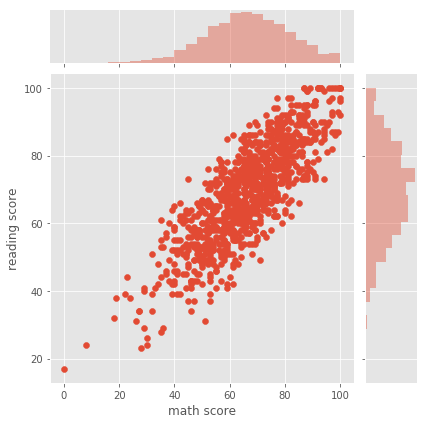

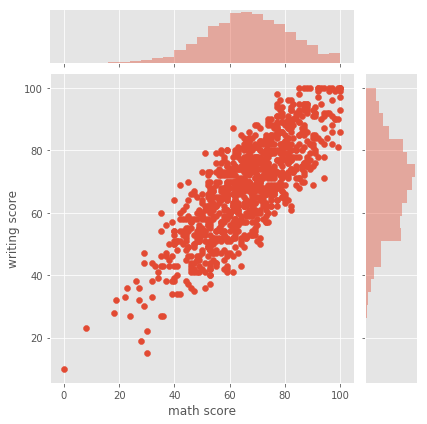

In [5]:
score_cols = ['math score', 'reading score','writing score']
from scipy.stats import norm

def Plot_Dist(df,col):
    fig,axarr = plt.subplots(1,2,figsize=(12,4))
    # plot distribution
    sns.distplot(df[col], fit=norm, kde=False,ax=axarr[0])
    #Q-Q plot
    from statsmodels.graphics.gofplots import qqplot
    qqplot(SP_df['math score'],line='s',ax=axarr[1])
    fig.suptitle(col+' distribution',fontsize=14)
    plt.show()

Plot_Dist(SP_df,col='math score')
Plot_Dist(SP_df,col='reading score')
Plot_Dist(SP_df,col='writing score')


ax1=sns.jointplot(x="math score", y="reading score", data=SP_df)
plt.show()

ax2=sns.jointplot(x="math score", y="writing score", data=SP_df)
plt.show()

In [6]:
def Plot_Set(df,xcol,ycols):
    df = df.sort_values(by=xcol)
    fig,axarr = plt.subplots(1,3,figsize=(12,5))
    for id,ycol in enumerate(ycols):
        medians = df.groupby([xcol])[ycol].median().values
        median_labels = [str(np.round(s, 2)) for s in medians]
        pos = range(len(medians))
        sns.boxplot(x=xcol, y=ycol, data=df,width=0.5,palette='Set3',ax=axarr[id],linewidth=0.5)
        for tick,label in zip(pos,axarr[id].get_xticklabels()):
            axarr[id].text(pos[tick], medians[tick] + 0.5, median_labels[tick], horizontalalignment='center', size='medium', color='k', weight='semibold')
        axarr[id].set_ylim([0,105])
        plt.setp(axarr[id].get_xticklabels(), rotation=25,ha='right')
    #fig.suptitle('Variation of Scores with '+xcol,fontsize=16,y=1.05)
    plt.tight_layout()
    plt.show()

#### Variation of Scores with Gender of the student
Female students beat male counter parts in reading and writing. In math, boys on an average do better than girls.

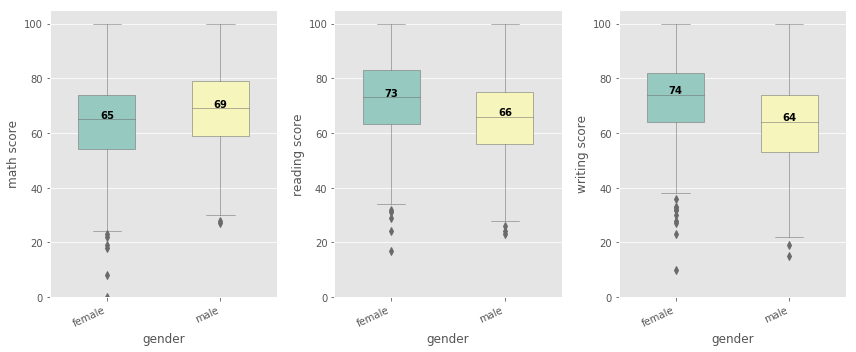

In [7]:
Plot_Set(SP_df,xcol='gender',ycols=['math score','reading score','writing score'])

#### Variation of Scores with race/ethnicity
Race has a significant influence on test scores. For all subjects, students in group E perform better than students from other ethnicity.  

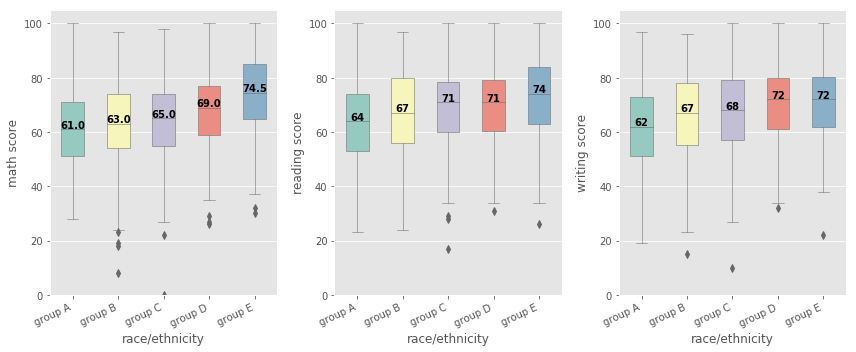

In [8]:
Plot_Set(SP_df,xcol='race/ethnicity',ycols=['math score','reading score','writing score'])

#### Variation of Scores with parental level of education
Education level of parents has a direct impact on the test scores. Higher the education level of the parent, higher the student scores.

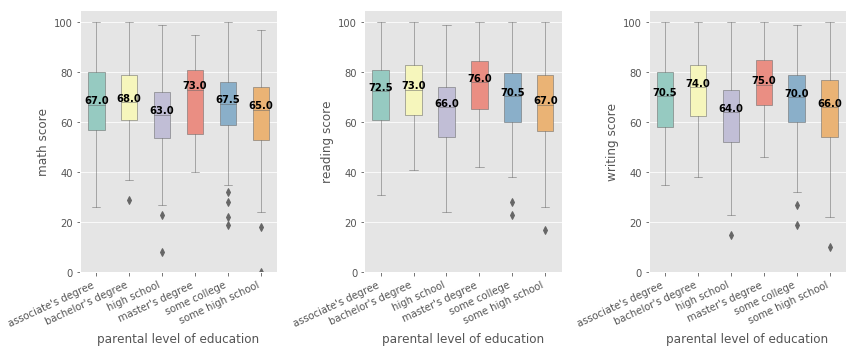

In [9]:
Plot_Set(SP_df,xcol='parental level of education',ycols=['math score','reading score','writing score'])

#### Variation of Scores with lunch type
* Many schools in the US offer free lunch for students coming from poor families (Ref: https://www.fns.usda.gov/nslp/national-school-lunch-program-nslp)
* Whether the student gets the standard lunch or free/reduced lunch has an impact on the scores. It is evident students from lower income families on an average have 5-10 points lower scores than those who can afford standard lunches. 

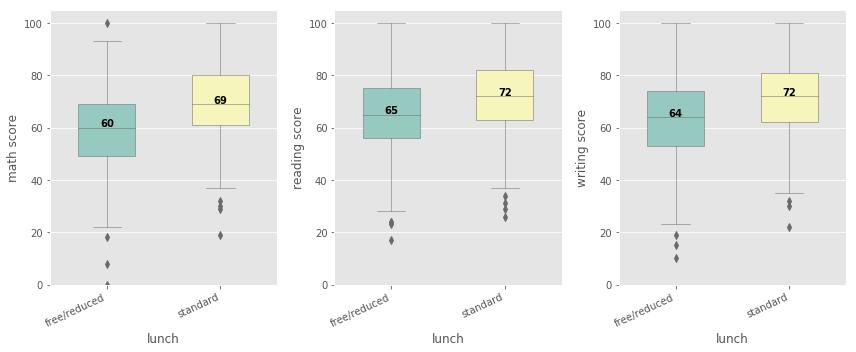

In [10]:
Plot_Set(SP_df,xcol='lunch',ycols=['math score','reading score','writing score'])

#### Variation of Scores with test preparation course
Students who completed a preparation course prior to the test consistently outperform students who didnt take such a course

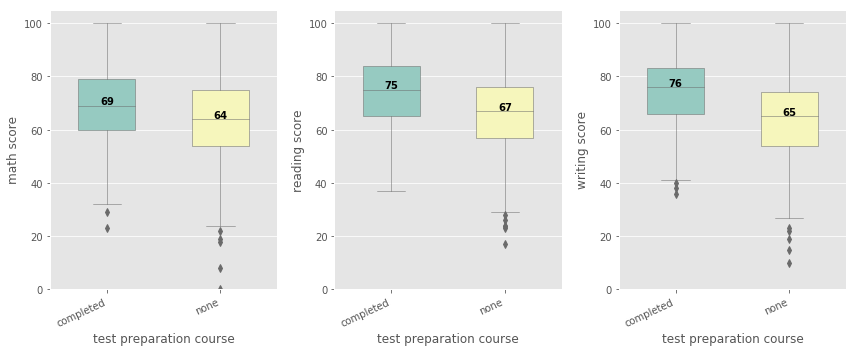

In [11]:
Plot_Set(SP_df,xcol='test preparation course',ycols=['math score','reading score','writing score'])

### How does test preparation affect scores for students from different income levels (based on lunch type) ?
* I use student t-tests to measure the impact of test preparation on student scores with free/reduced vs standard lunch 
types. 
* Results below suggest (based on very low p-values) irrespective of the lunch type, test preparation provides a stastically signficant improvent in test scores.
* However, the difference in means are consistently higher for students with 'free/reduced' lunch type. This indicates test preparation has an outsized impact on scores for students from low income families (6 points increase for math and more than 11 points increase for writing).

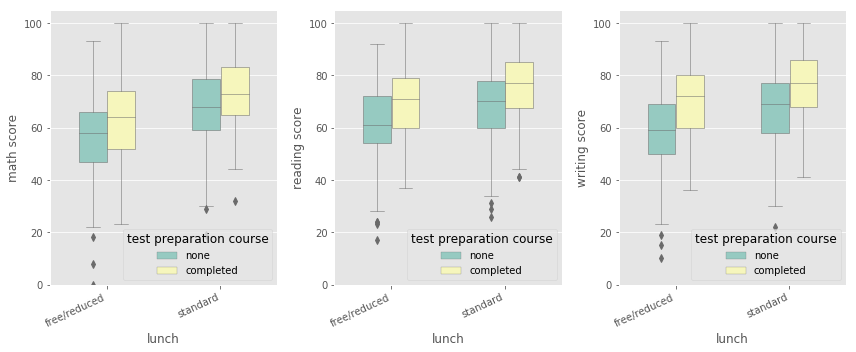

impact of test prep on math score for lunch type: free/reduced
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      6.5369      1.633      4.003      0.000       3.325       9.749
impact of test prep on reading score for lunch type: free/reduced
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      8.2676      1.581      5.231      0.000       5.159      11.376
impact of test prep on writing score for lunch type: free/reduced
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

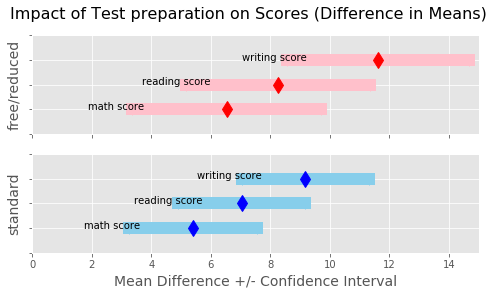

In [12]:
xcol = 'lunch'
ycols = ['math score','reading score','writing score']

SP_df = SP_df.sort_values(by=xcol)
fig,axarr = plt.subplots(1,3,figsize=(12,5))
for id,ycol in enumerate(ycols):
    sns.boxplot(x=xcol, y=ycol, hue='test preparation course', data=SP_df,width=0.5,palette='Set3',ax=axarr[id],linewidth=0.5)
    axarr[id].set_ylim([0,105])
    plt.setp(axarr[id].get_xticklabels(), rotation=25,ha='right')
#fig.suptitle('Variation of Scores with '+xcol,fontsize=16,y=1.05)
plt.tight_layout()
plt.show()

# Hypothesis Testing
df_LunchFree_PrepNo  = SP_df[(SP_df['lunch'].str.contains('free')) & (SP_df['test preparation course'].str.contains('none'))]
df_LunchFree_PrepYes = SP_df[(SP_df['lunch'].str.contains('free')) & (SP_df['test preparation course'].str.contains('complete'))]

df_LunchStd_PrepNo  = SP_df[(SP_df['lunch'].str.contains('stan')) & (SP_df['test preparation course'].str.contains('none'))]
df_LunchStd_PrepYes = SP_df[(SP_df['lunch'].str.contains('stan')) & (SP_df['test preparation course'].str.contains('complete'))]

def CompMeans(df1,df2,ct,yparam,ax):
    import statsmodels.stats.api as sms
    yval = 0.25
    cols = ['math score','reading score','writing score']
    meanlist = []
    CFlist   = []
    for col in cols:
        X1 = df1[col]
        X2 = df2[col]
        cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
        means_diff = X1.mean() - X2.mean()
        CF = cm.tconfint_diff(usevar='unequal')
        print('impact of test prep on '+col+' for lunch type: '+yparam)
        print(cm.summary())
        x1 = CF[0]
        x2 = CF[1]
        ax.plot( [x1,x2],[yval,yval], marker='|',markersize=12, color=ct[0], linewidth=12)
        ax.plot(means_diff,yval,marker='d',color=ct[1],markersize=12)
        ax.annotate(col,xy=(x1-1.5, yval), xycoords='data')
        yval +=0.25
        ax.set_ylabel(yparam,fontsize=14)
        ax.set_ylim([0,1])
        ax.yaxis.set_ticklabels([])
        
fig,axarr = plt.subplots(2,1,figsize=(8,4),sharex = True)

ct = ['pink','red']
yparam = 'free/reduced'
CompMeans(df_LunchFree_PrepYes,df_LunchFree_PrepNo,ct,yparam,axarr[0])
ct = ['skyblue','blue']
yparam = 'standard'
CompMeans(df_LunchStd_PrepYes,df_LunchStd_PrepNo,ct,yparam,axarr[1])
plt.xlabel('Mean Difference +/- Confidence Interval',fontsize=14)
plt.xlim([0,15])
fig.suptitle('Impact of Test preparation on Scores (Difference in Means)',fontsize=16)
plt.show()

### Predictive Modeling
+ To build a predictive model, we group the scores into 6 grade classes (A - F). This is used as the target variable.
+ The independant variables are one-hot encoded for use in the scikit-learn model building process.


In [13]:
from sklearn.model_selection import train_test_split
SP_df['Total Score'] = SP_df['math score'] + SP_df['reading score'] + SP_df['writing score']
input_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Convert Total Scores to Grades
FScore = 40*3 #Total Score Cutoff for Passing Grade
EScore = 50*3 #Total Score Cutoff for E Grade
DScore = 60*3 #Total Score Cutoff for D Grade
CScore = 70*3 #Total Score Cutoff for C Grade
BScore = 80*3 #Total Score Cutoff for B Grade


SP_df.loc[SP_df['Total Score']<FScore,'Grade']  = 'F'
SP_df.loc[(SP_df['Total Score']>=FScore) & (SP_df['Total Score']<EScore),'Grade'] = 'E'
SP_df.loc[(SP_df['Total Score']>=EScore) & (SP_df['Total Score']<DScore),'Grade'] = 'D'
SP_df.loc[(SP_df['Total Score']>=DScore) & (SP_df['Total Score']<CScore),'Grade'] = 'C'
SP_df.loc[(SP_df['Total Score']>=CScore) & (SP_df['Total Score']<BScore),'Grade'] = 'B'
SP_df.loc[(SP_df['Total Score']>=BScore),'Grade'] = 'A'

target_col = ['Grade']

X = pd.get_dummies(SP_df[input_cols])
y = np.array(SP_df[target_col]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y)

y_trainLB = lb.transform(y_train)
y_testLB = lb.transform(y_test)

#### Logistic Regression
* Note that the intercept was set to False to remove issues with collinearity with one-hot encoding.
* The model has an average AUC = 0.67, with Grade = 'C' having the highest classification error (with lowest AUC).
* The model coefficients provide an idea of important factors. The most important variables driving higher scores are 
    * lunch = 'standard'
    * test preparation course = 'completed'
    * parental education level = 'bachelor degree'

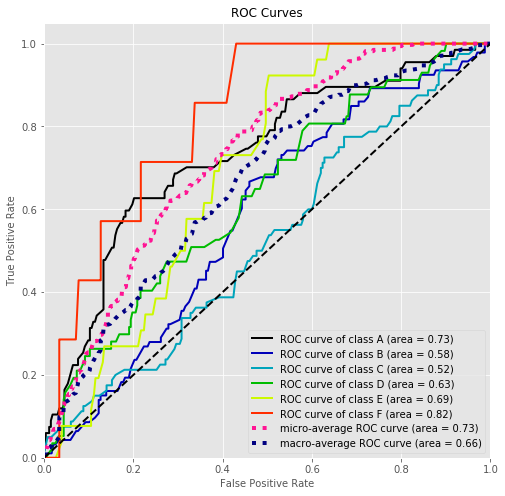

,Features,Coefficient,odds
10,parental level of education_master's degree,0.858947,2.360673
14,lunch_standard,0.737280,2.090243
15,test preparation course_completed,0.706972,2.027842
6,race/ethnicity_group E,0.554417,1.740926
0,gender_female,0.410692,1.507862
5,race/ethnicity_group D,0.298363,1.347651
8,parental level of education_bachelor's degree,0.259078,1.295735
7,parental level of education_associate's degree,0.139109,1.149250
11,parental level of education_some college,0.039784,1.040586
4,race/ethnicity_group C,-0.066327,0.935824


In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',fit_intercept=False, multi_class='multinomial')
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_prob = clf.predict_proba(X_test)
y_pred = [x[1] for x in y_prob]

## Plot ROC Curve for all classes
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test# ground truth labels
y_probas = y_prob# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas,figsize=(8,8))
plt.show()


Fimp = pd.DataFrame({'Features':X.columns.tolist(),'Coefficient':clf.coef_[0]})
Fimp['odds'] = np.exp(Fimp['Coefficient'])
Fimp = Fimp.sort_values(by=['odds'],ascending=False)
Fimp

### Random Forest Classifier
* A tree based ensemble method is tried to compare against logistic regression model.
* We use skopt to conduct hyper parameter optimization and find the most optimal set.
* The model performs worse having AUC = 0.63 (compared to logistic regression), with Grade = 'C' target class having the highest classification error (with lowest AUC).
* The model coefficients provide an idea of important factors. The most important unique variables driving higher scores are 
    * lunch = 'standard'
    * test preparation course = 'none'
    * race/ethnicity group  = 'E'

C:\Users\bnsha_000\Miniconda3\envs\pykeras\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\bnsha_000\Miniconda3\envs\pykeras\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best parameters:
- n_estimators=500
- max_features=1
- max_depth=1


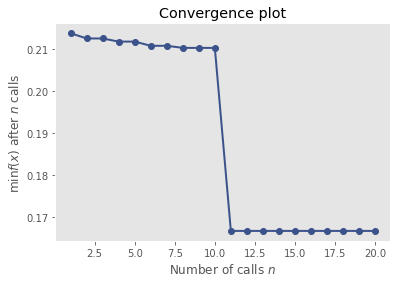

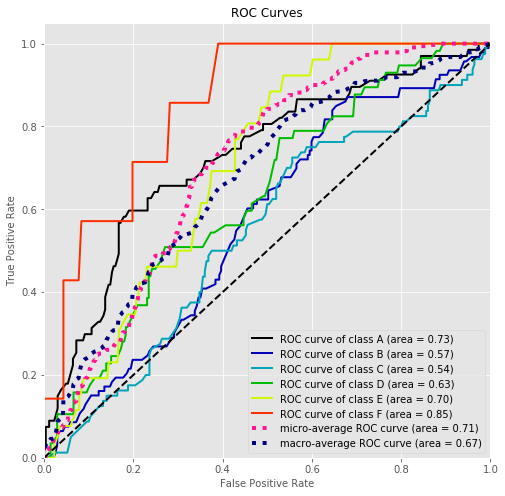

,Features,Importance
13,lunch_free/reduced,0.080
16,test preparation course_none,0.076
10,parental level of education_master's degree,0.068
15,test preparation course_completed,0.066
9,parental level of education_high school,0.066
7,parental level of education_associate's degree,0.064
2,race/ethnicity_group A,0.064
8,parental level of education_bachelor's degree,0.058
6,race/ethnicity_group E,0.056
5,race/ethnicity_group D,0.056


In [17]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)

n_features = X_test.shape[1]
# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(50, 500, name='n_estimators'),
          Integer(1, n_features, name='max_features'),
          Integer(1, 50, name='max_depth')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    clf.set_params(**params)
    return -np.mean(cross_val_score(clf, X_train, y_trainLB, cv=5, n_jobs=-1,scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)

"Best score=%.4f" % res_gp.fun
print("""Best parameters:
- n_estimators=%d
- max_features=%d
- max_depth=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2]))

from skopt.plots import plot_convergence
%matplotlib inline
plot_convergence(res_gp);

from sklearn.metrics import mean_squared_error, r2_score
best_params = {'n_estimators':res_gp.x[0],'max_features':res_gp.x[1],'max_depth':res_gp.x[2]}

clf = RandomForestClassifier(**best_params)
clf.fit(X_train,y_train)

# Make predictions using the testing set
y_prob = clf.predict_proba(X_test)
y_pred = [x[1] for x in y_prob]

## Plot ROC Curve for all classes
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test# ground truth labels
y_probas = y_prob# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas,figsize=(8,8))
plt.show()

Fimp = pd.DataFrame({'Features':X.columns.tolist(),'Importance':clf.feature_importances_})
Fimp = Fimp.sort_values(by=['Importance'],ascending=False)
Fimp

## Thanks for going through the kernel. Hope it is useful!